In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [9]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"https\S+|@\S+|#\S+|[^a-zA-Z\s]", '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X = vect.fit_transform(df['clean_text'])
y = df['airline_sentiment']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1683  151   55]
 [ 203  334   43]
 [  85   58  316]]
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      1889
     neutral       0.62      0.58      0.59       580
    positive       0.76      0.69      0.72       459

    accuracy                           0.80      2928
   macro avg       0.74      0.72      0.73      2928
weighted avg       0.79      0.80      0.79      2928



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 300.4/300.4 kB 663.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


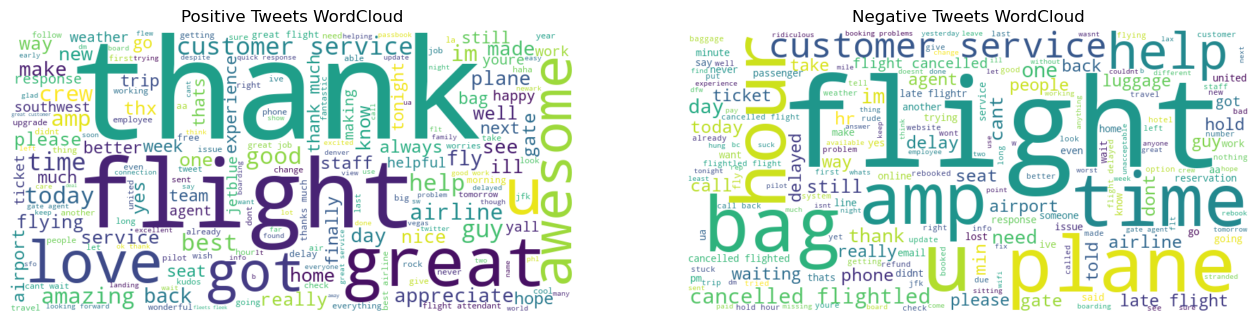

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative tweets
positive_tweets = df[df['airline_sentiment'] == 'positive']
negative_tweets = df[df['airline_sentiment'] == 'negative']

# Generate WordCloud for Positive
positive_text = " ".join(positive_tweets['clean_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate WordCloud for Negative
negative_text = " ".join(negative_tweets['clean_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets WordCloud")

plt.show()


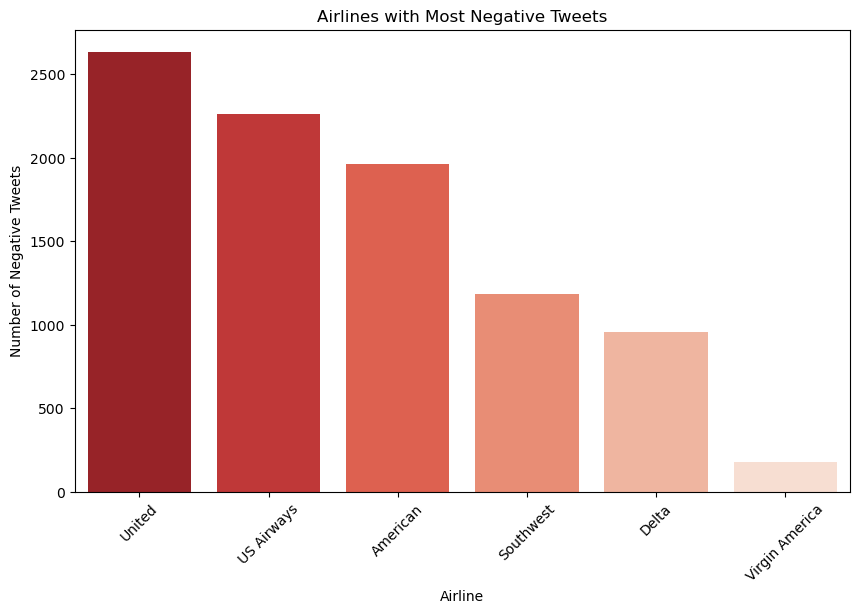

In [10]:
import seaborn as sns

# Count negative tweets per airline
neg_by_airline = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=neg_by_airline.index, y=neg_by_airline.values, palette='Reds_r')
plt.title("Airlines with Most Negative Tweets")
plt.xlabel("Airline")
plt.ylabel("Number of Negative Tweets")
plt.xticks(rotation=45)
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text'])
y = df['airline_sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LinearSVC()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1691  148   50]
 [ 231  295   54]
 [  91   64  304]]
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      1889
     neutral       0.58      0.51      0.54       580
    positive       0.75      0.66      0.70       459

    accuracy                           0.78      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.77      0.78      0.78      2928



In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")


Model Accuracy: 78.21%


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import joblib
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Only needed once
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load your cleaned dataset
df = pd.read_csv("Tweets.csv")  # or use your cleaned dataframe if it's still in memory

# Clean function (same as before)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-zA-Z\s]", '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# TF-IDF + Model training
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text'])
y = df['airline_sentiment']

model = LinearSVC()
model.fit(X, y)

# Save model and vectorizer
joblib.dump(model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kubsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['tfidf_vectorizer.pkl']